# Team 10 Members

* Turki Baghlaf
* Rayan Edrees
* Yazeed Bazli

# The best score is 0.13334

![Best scores]("img/scores.png")


# link to Kaggle Kernel
[link](https://www.kaggle.com/baghlafturki/house-prices-prediction?scriptVersionId=31098471)

In [1]:
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score


from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import GridSearchCV,cross_validate
from sklearn.metrics import mean_squared_error


from scipy.stats import normaltest, norm, skew

## Importing datasets

In [2]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')
# this is not to skip some columns when showing the dataframe
pd.set_option('display.max_columns', df.shape[-1])

In [3]:
print("The shape of train is {}\nThe shape of test is {}".format(df.shape,df1.shape))

The shape of train is (1460, 81)
The shape of test is (1459, 80)


The missing column in test is the target

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## completeness of the Datasets

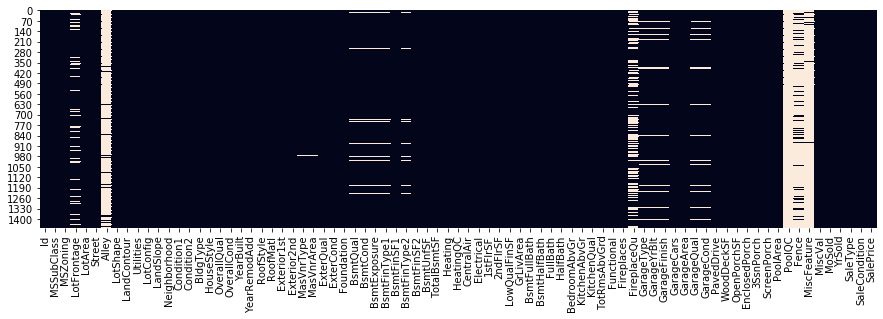

In [6]:
# For train.csv
plt.figure(figsize=(15, 4))
sns.heatmap(df.isna(),cbar=False)

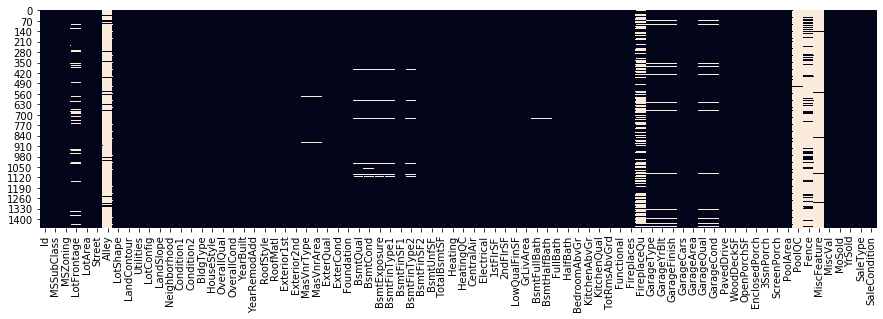

In [7]:
#For test.csv
plt.figure(figsize=(15, 4))
sns.heatmap(df1.isna(),cbar=False)

## Finding the features that have high correlation with target

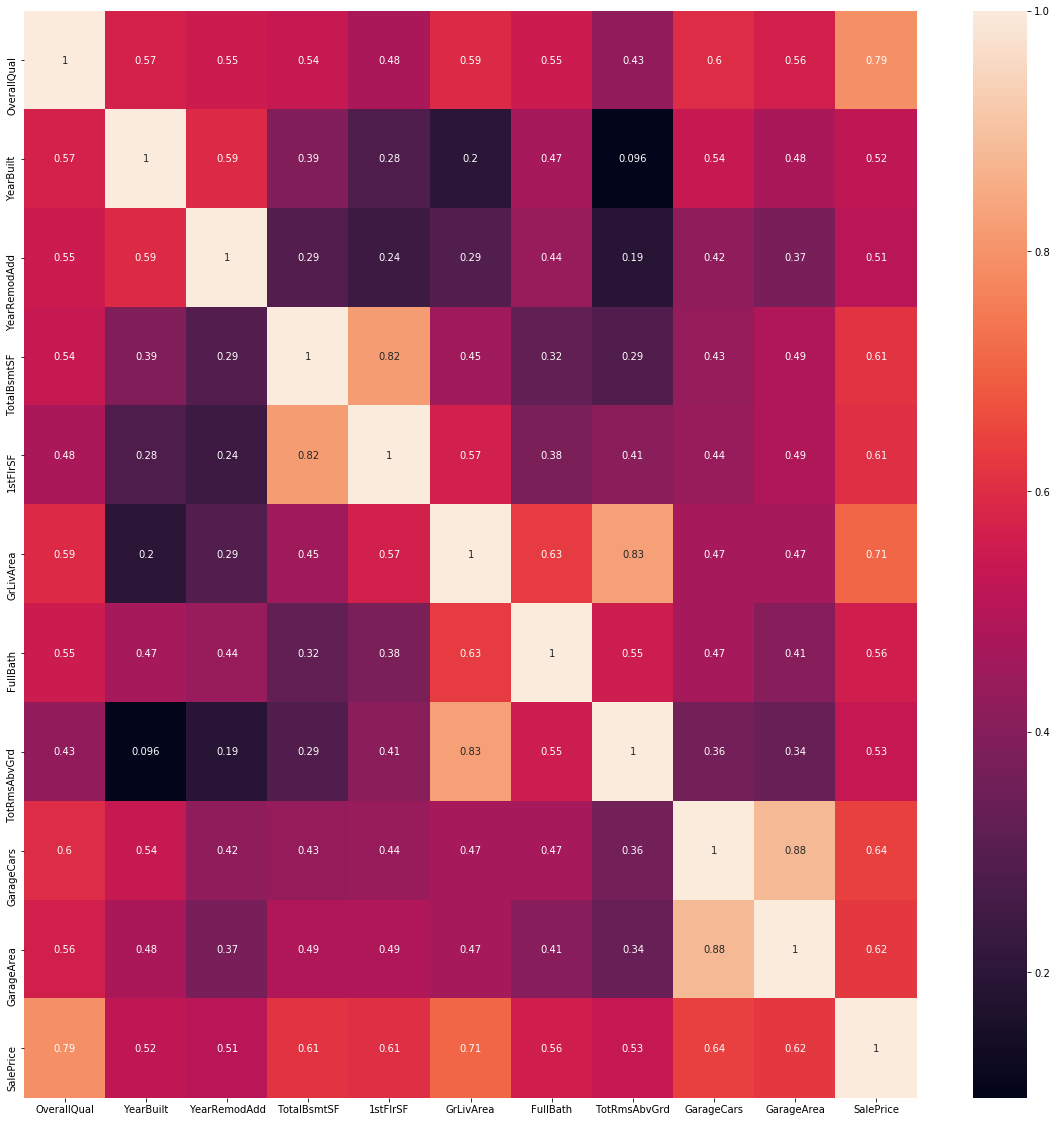

In [8]:
# getting the correlation table
corr = df.corr()
# selecting only correlations that have a strength above 0.5 both ways
top_corr = corr.index[abs(corr['SalePrice'])>0.5]

# plot it in a heatmap
plt.figure(figsize = (20,20))
sns.heatmap(df[top_corr].corr(),cbar=True, annot=True)

Above we can see that all the features in y-axis have correlation with the target of strength above 0.5

### Plotting a pairplot for every feature with high correlation

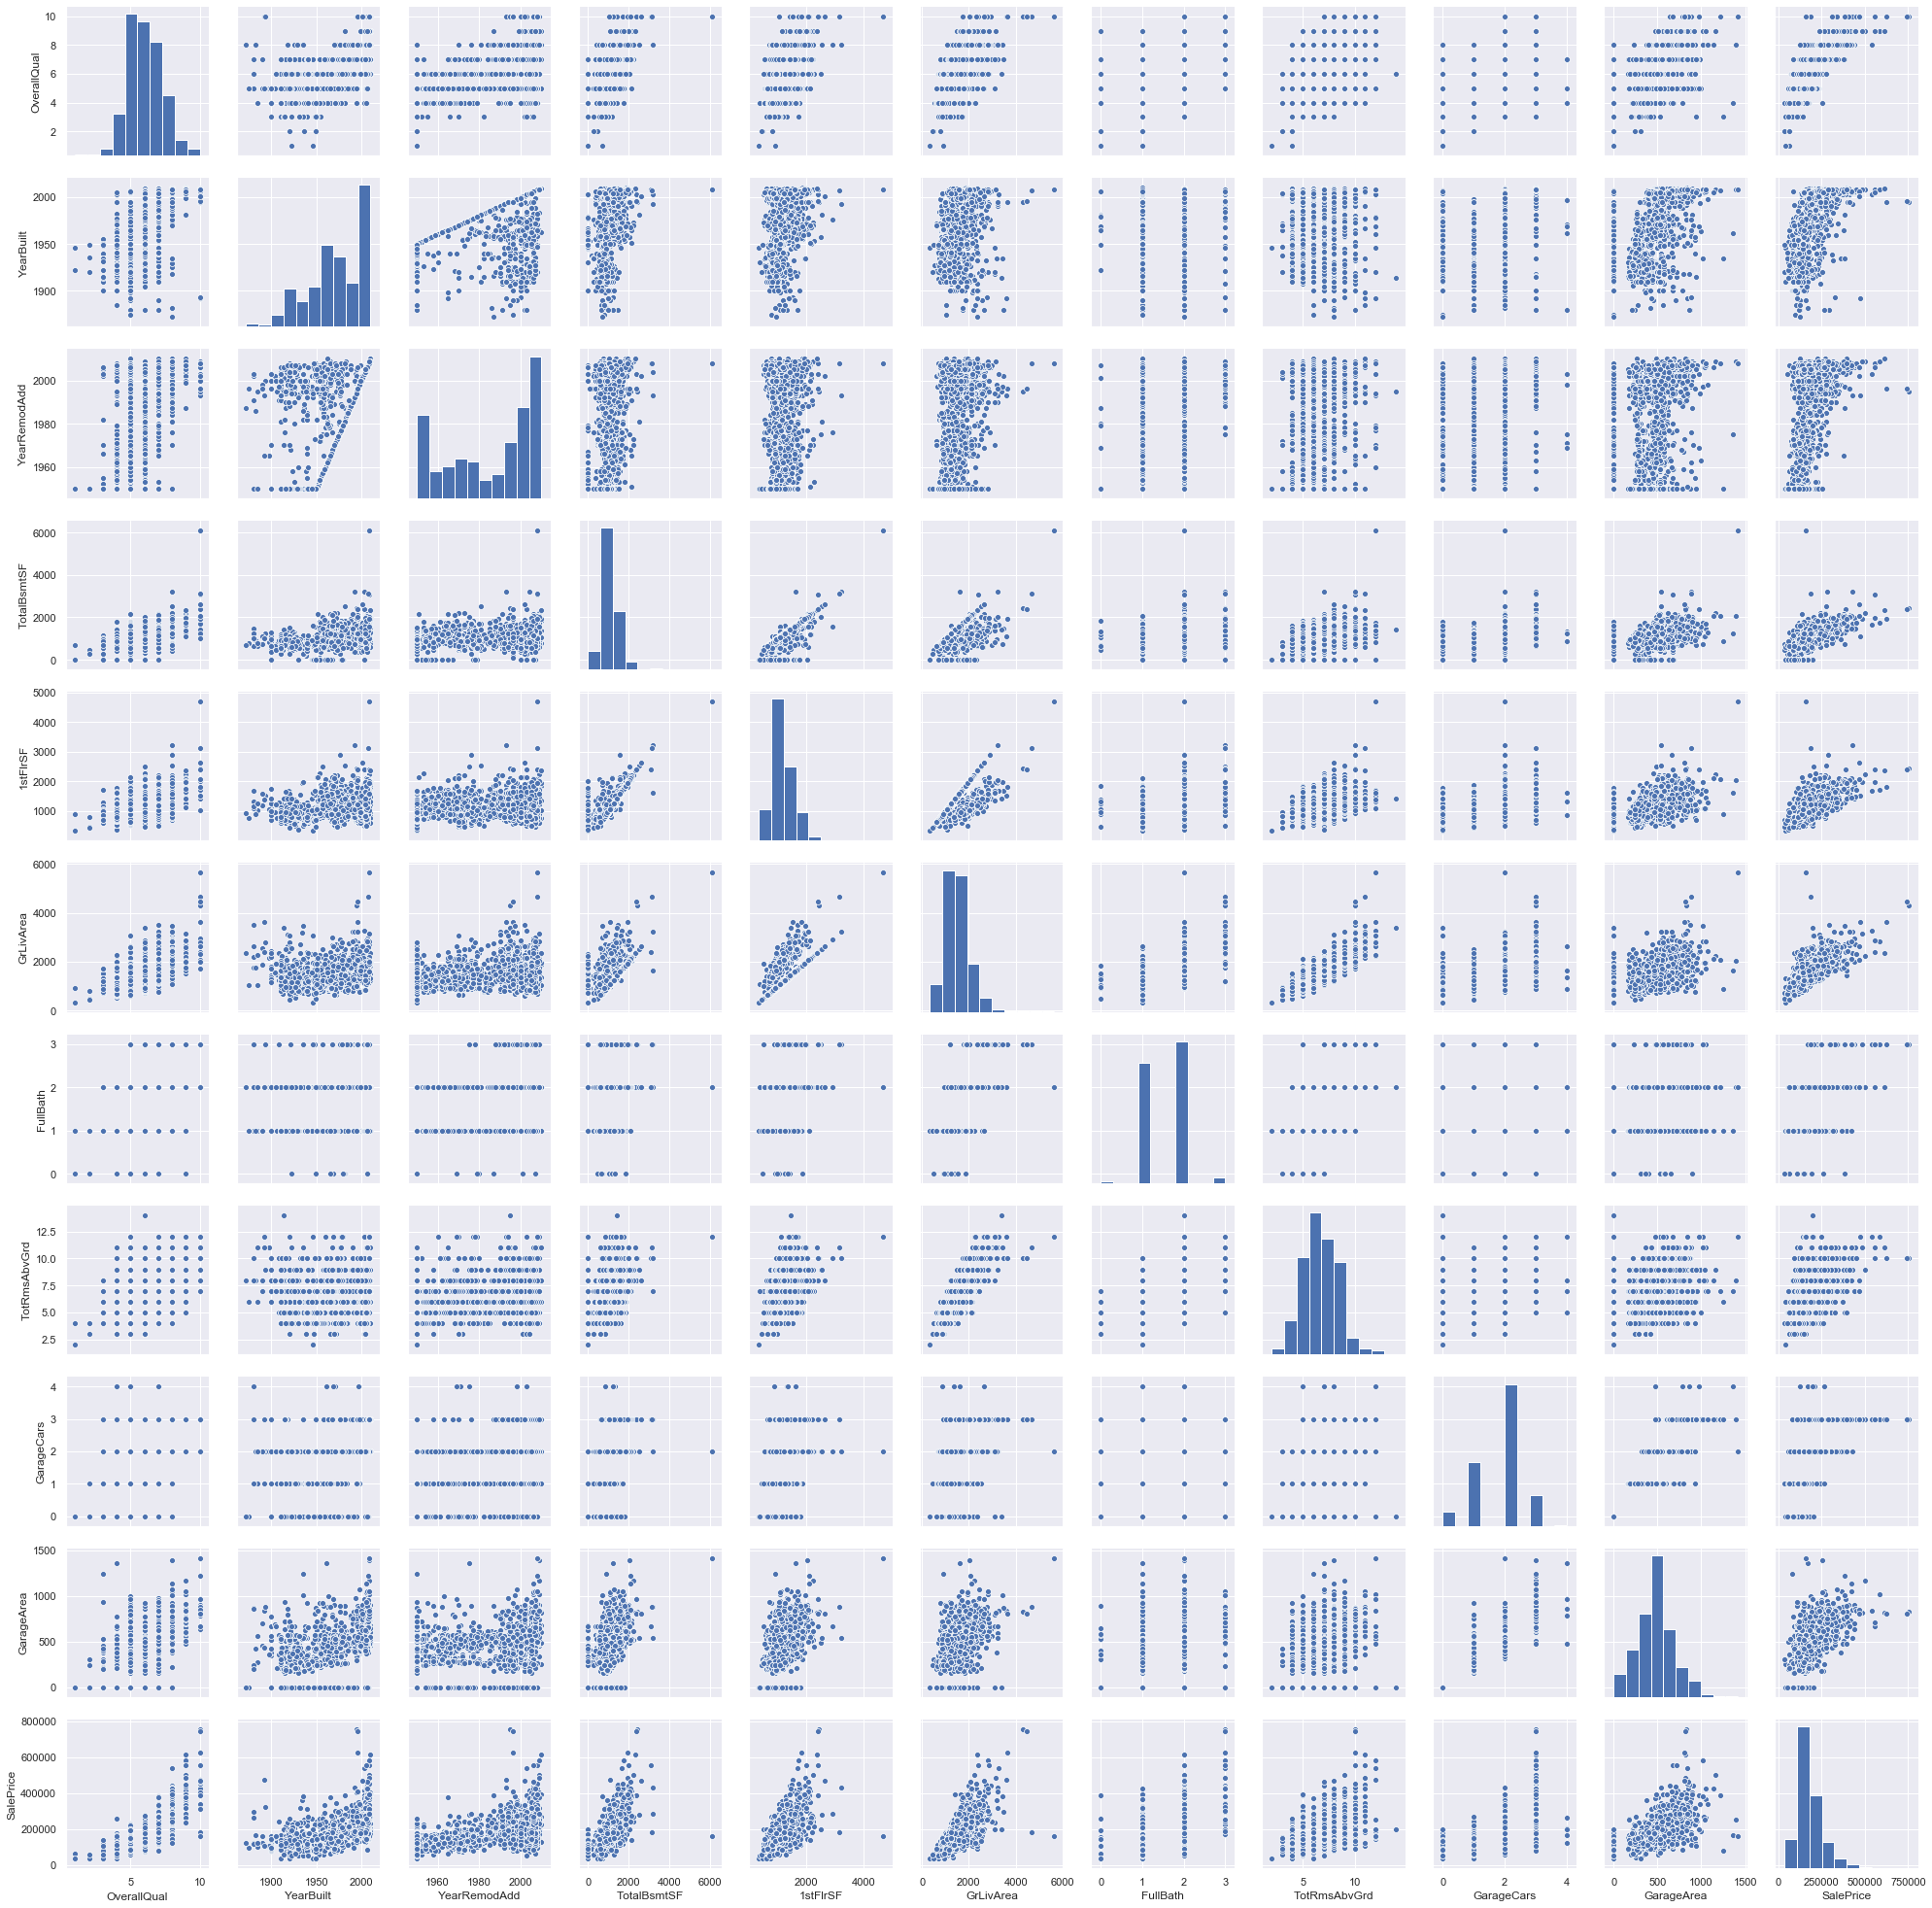

In [9]:
#WARNING: This will take very long to execute
sns.set()
sns.pairplot(df[top_corr], height = 2.5)

From the pairplot above, we can see that some of the features are skewed and in some scatterplots, we can see a slight correlation. However, it is difficult to see everything in a pairplot

### Plotting a scatterplot for each moderately correlated feature and the target and eleminating outliers

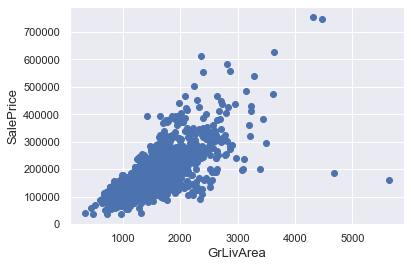

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [11]:
# removing some outliers
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']>100000)].index)

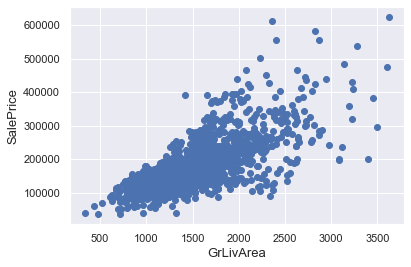

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

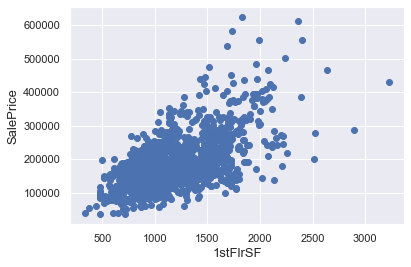

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = df['1stFlrSF'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()

In [14]:
df = df.drop(df[(df['1stFlrSF']>2700) & (df['SalePrice']>100000)].index)

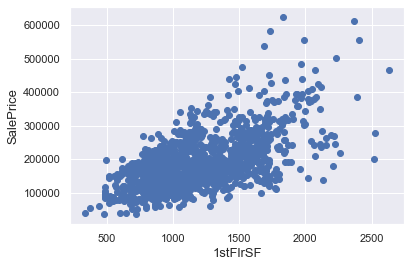

In [15]:
fig, ax = plt.subplots()
ax.scatter(x = df['1stFlrSF'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()

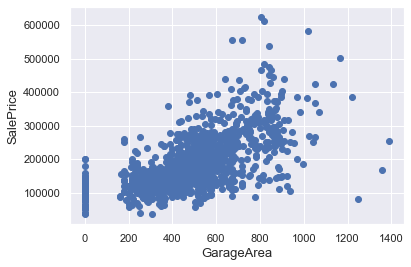

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = df['GarageArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

In [17]:
df = df.drop(df[(df['GarageArea']>1240) & (df['SalePrice']<300000)].index)

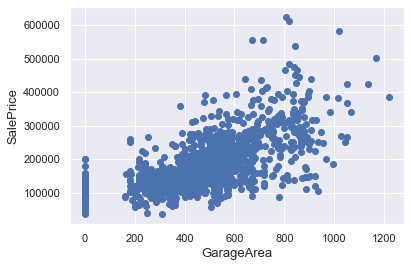

In [18]:
fig, ax = plt.subplots()
ax.scatter(x = df['GarageArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

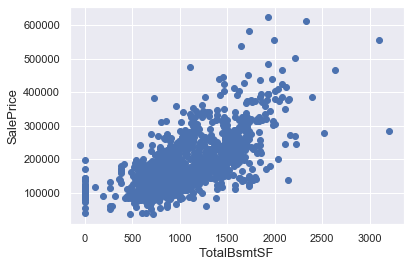

In [19]:
fig, ax = plt.subplots()
ax.scatter(x = df['TotalBsmtSF'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

In [20]:
df = df.drop(df[(df['TotalBsmtSF']>3000) & (df['SalePrice']>200000)].index)

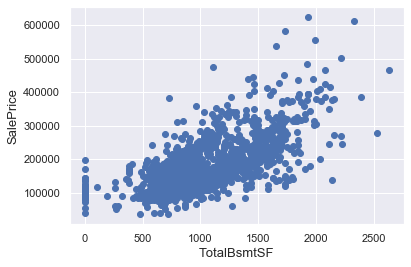

In [21]:
fig, ax = plt.subplots()
ax.scatter(x = df['TotalBsmtSF'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

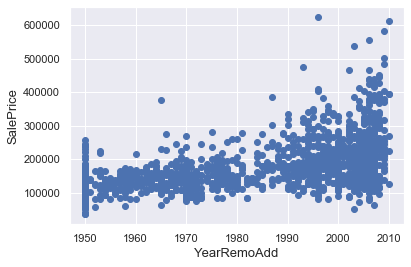

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = df['YearRemodAdd'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearRemoAdd', fontsize=13)
plt.show()

df = df.drop(df[(df['YearRemodAdd']<1970) & (df['SalePrice']>300000)].index)
df = df.drop(df[(df['YearRemodAdd']<2000) & (df['SalePrice']>600000)].index)


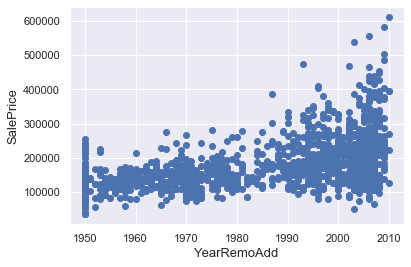

In [23]:
fig, ax = plt.subplots()
ax.scatter(x = df['YearRemodAdd'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearRemoAdd', fontsize=13)
plt.show()

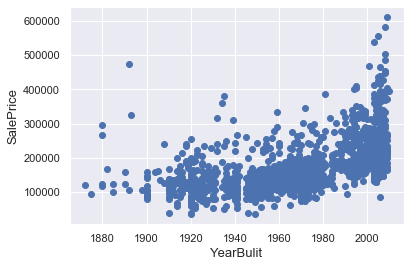

In [24]:
fig, ax = plt.subplots()
ax.scatter(x = df['YearBuilt'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearBulit', fontsize=13)
plt.show()
df = df.drop(df[(df['YearBuilt']<1900) & (df['SalePrice']>400000)].index)

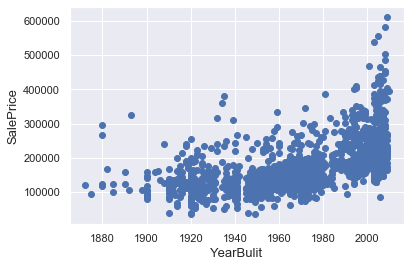

In [25]:

fig, ax = plt.subplots()
ax.scatter(x = df['YearBuilt'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearBulit', fontsize=13)
plt.show()

## Concatenating both Dataframes

#### First we need to take out the label as test.csv does not have a label

In [26]:
target = df.pop('SalePrice')

In [27]:
#concatinating the two dataframes
whole_df = pd.concat([df,df1],keys=[0,1])
# Sanity check to ensure the total length matches 
whole_df.shape[0] == df.shape[0]+df1.shape[0]

True

##### preserving the IDs to ensure they dont get modified by mistake

In [28]:
whole_IDs = whole_df.pop('Id')

## Classifying the features 

Non_num_cols will have all the columns names that are not numeric

nun_cols will have all the columns names that are numeric

check_list has the names of columns that contain "NA" based on the data discription

In [29]:
non_num_cols = whole_df.select_dtypes(include=object).columns.tolist()
num_cols = whole_df.select_dtypes(include=np.number).columns.tolist()
#checking column discription and adding each column containing NA as a value to the list
check_list = ['Alley','BsmtQual',"BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType",'GarageFinish','GarageQual',"GarageCond",'PoolQC','Fence','MiscFeature']

In [30]:
def unique_values(df,cols,n_unique_vals=None, return_cols=False):
    '''
    Given the dataframe and feature names, this function will print out or return
    all the unique values in each column.
    
    In case n_unique_vals is set to an integer, any column which has the number
    of unique values over the value passed as an argument will only be printed
    '''
    output = []  #to accumulate the column names (only usefull when return_cols is True)
    
    for col in cols:
        # if user didnt specify a threshold
        if n_unique_vals == None: 
            print("{}: {}".format(col,df[col].unique()))
            output.append(col)
        # if number of unique values in the feature is more than specified by user
        elif n_unique_vals >= len(df[col].unique()):
            print("{}: {}".format(col,df[col].unique()))
            output.append(col)
    # if user wants the name of the columns to be returned
    if return_cols:
        return output
    
    
def make_category_numeric(df,col):
    '''
    This function helps convert non numeric categorical features to numeric categorical features
    it is used to find the distribution
    '''
    # count how many unique values in the column
    # for each unique value, mape all similar values to a number starting from 0
    return df[col].dropna().map({value:idx for idx,value in enumerate(df[col].unique())})




def missing_percentage(df, cols, verbose = 1, threshold = 0.00, return_output=False):
    '''
    This function calculates the percentage of missing enteries in each column in cols
    Threshold is a percentage of which the feature will only be shown if the percentage
    of missing data in the feature is more than the percentage specified
    '''
    result = []
    for col in cols:
        
        # calculate the percentage of missing data in the column
        percentage = df[col].isna().sum() / df[col].shape[0]
        
        # user wants to see the percentage of every column
        if verbose == 2:
            print("Missing data in {} is {:.2%}".format(col,percentage))
            
        # user only wants to see for columns which actually has missing data
        elif verbose == 1 and percentage > float(threshold):
            print("Missing data in {} is {:.2%}".format(col,percentage))
            
        # this is used with return output to return columns which the missing
        # data percentage is above the specified threshold
        if percentage > float(threshold):
            result.append(col)
            
    if return_output:
        return result



def classify_distribution(df,columns,numeric=True):
    '''This function runs a normality test using the p-value. The threshold is set to 0.05'''
    result = []
    for col in columns:
        num_cat_col = make_category_numeric(df,col) if not numeric else df[col].dropna()

            # run normality test >> reference:#http://mathforum.org/library/drmath/view/72065.html
        if normaltest(num_cat_col)[-1] > 0.05: 
            # if test succeeds it means it is normal
            result.append((col,0))
        else:
            # if not normal then return the skew
            result.append((col,num_cat_col.skew()))

    return result



# show only categorical columns that have missing data        
missing_percentage(whole_df,non_num_cols,verbose=1)

Missing data in MSZoning is 0.14%
Missing data in Alley is 93.18%
Missing data in Utilities is 0.07%
Missing data in Exterior1st is 0.03%
Missing data in Exterior2nd is 0.03%
Missing data in MasVnrType is 0.83%
Missing data in BsmtQual is 2.79%
Missing data in BsmtCond is 2.82%
Missing data in BsmtExposure is 2.82%
Missing data in BsmtFinType1 is 2.72%
Missing data in BsmtFinType2 is 2.72%
Missing data in Electrical is 0.03%
Missing data in KitchenQual is 0.03%
Missing data in Functional is 0.07%
Missing data in FireplaceQu is 48.85%
Missing data in GarageType is 5.40%
Missing data in GarageFinish is 5.47%
Missing data in GarageQual is 5.47%
Missing data in GarageCond is 5.47%
Missing data in PoolQC is 99.72%
Missing data in Fence is 80.41%
Missing data in MiscFeature is 96.42%
Missing data in SaleType is 0.03%


##### Checking the unique values of categorical columns that has 'NA' in the description

In [31]:
unique_values(whole_df,check_list)

Alley: [nan 'Grvl' 'Pave']
BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
FireplaceQu: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish: ['RFn' 'Unf' 'Fin' nan]
GarageQual: ['TA' 'Fa' 'Gd' nan 'Po' 'Ex']
GarageCond: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
PoolQC: [nan 'Ex' 'Fa' 'Gd']
Fence: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


##### replacing empty values with NA for only categories that contain NA as a value in discription

In [32]:
whole_df[check_list] = whole_df[check_list].fillna(value='NA',axis=1)

In [33]:
# rechecking the unique values after filling nun with NA
unique_values(whole_df,check_list)

Alley: ['NA' 'Grvl' 'Pave']
BsmtQual: ['Gd' 'TA' 'Ex' 'NA' 'Fa']
BsmtCond: ['TA' 'Gd' 'NA' 'Fa' 'Po']
BsmtExposure: ['No' 'Gd' 'Mn' 'Av' 'NA']
BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ']
BsmtFinType2: ['Unf' 'BLQ' 'NA' 'ALQ' 'Rec' 'LwQ' 'GLQ']
FireplaceQu: ['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'NA' 'Basment' '2Types']
GarageFinish: ['RFn' 'Unf' 'Fin' 'NA']
GarageQual: ['TA' 'Fa' 'Gd' 'NA' 'Po' 'Ex']
GarageCond: ['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']
PoolQC: ['NA' 'Ex' 'Fa' 'Gd']
Fence: ['NA' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature: ['NA' 'Shed' 'Gar2' 'Othr' 'TenC']


In [34]:
# checking if they still have a nan values
missing_percentage(whole_df,check_list,verbose=1)
#nothing is returned which means no nan values, feel free to change verbose to 2

Now, we dealt with the null values of categorical features which contain NA in their description.

Getting the remaining categorical columns which contains nan values 

In [35]:
missing_categorical = missing_percentage(whole_df,non_num_cols,verbose=1,return_output=True)

Missing data in MSZoning is 0.14%
Missing data in Utilities is 0.07%
Missing data in Exterior1st is 0.03%
Missing data in Exterior2nd is 0.03%
Missing data in MasVnrType is 0.83%
Missing data in Electrical is 0.03%
Missing data in KitchenQual is 0.03%
Missing data in Functional is 0.07%
Missing data in SaleType is 0.03%


##### It seems that some numerical columns are actually classes (categorical)

In [36]:
# getting all the columns that have less than 25 unique values in them
numeric_category = unique_values(whole_df,num_cols,25, return_cols=True)

MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]
OverallQual: [ 7  6  8  5  9  4 10  3  1  2]
OverallCond: [5 8 6 7 4 2 3 9 1]
BsmtFullBath: [ 1.  0.  2.  3. nan]
BsmtHalfBath: [ 0.  1.  2. nan]
FullBath: [2 1 3 0 4]
HalfBath: [1 0 2]
BedroomAbvGr: [3 4 1 2 0 5 6 8]
KitchenAbvGr: [1 2 3 0]
TotRmsAbvGrd: [ 8  6  7  9  5 11  4 10  3  2 14 12 13 15]
Fireplaces: [0 1 2 3 4]
GarageCars: [ 2.  3.  1.  0.  4.  5. nan]
PoolArea: [  0 512 648 576 519 738 144 368 444 228 561 800]
MoSold: [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold: [2008 2007 2006 2009 2010]


Converting numerical values which are actually categorical to be categorical

In [37]:
# getting the names of those columns
numeric_cats = unique_values(whole_df,num_cols,25, return_cols=True)

MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]
OverallQual: [ 7  6  8  5  9  4 10  3  1  2]
OverallCond: [5 8 6 7 4 2 3 9 1]
BsmtFullBath: [ 1.  0.  2.  3. nan]
BsmtHalfBath: [ 0.  1.  2. nan]
FullBath: [2 1 3 0 4]
HalfBath: [1 0 2]
BedroomAbvGr: [3 4 1 2 0 5 6 8]
KitchenAbvGr: [1 2 3 0]
TotRmsAbvGrd: [ 8  6  7  9  5 11  4 10  3  2 14 12 13 15]
Fireplaces: [0 1 2 3 4]
GarageCars: [ 2.  3.  1.  0.  4.  5. nan]
PoolArea: [  0 512 648 576 519 738 144 368 444 228 561 800]
MoSold: [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold: [2008 2007 2006 2009 2010]


In [38]:
#change it to type string to dummify it later
whole_df[numeric_cats] = whole_df[numeric_cats].astype(str)
whole_df[numeric_cats].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2905 entries, (0, 0) to (1, 1458)
Data columns (total 15 columns):
MSSubClass      2905 non-null object
OverallQual     2905 non-null object
OverallCond     2905 non-null object
BsmtFullBath    2905 non-null object
BsmtHalfBath    2905 non-null object
FullBath        2905 non-null object
HalfBath        2905 non-null object
BedroomAbvGr    2905 non-null object
KitchenAbvGr    2905 non-null object
TotRmsAbvGrd    2905 non-null object
Fireplaces      2905 non-null object
GarageCars      2905 non-null object
PoolArea        2905 non-null object
MoSold          2905 non-null object
YrSold          2905 non-null object
dtypes: object(15)
memory usage: 360.4+ KB


##### Missing categorical has all the newly converted categorical columns + the old remaining missing categorical columns


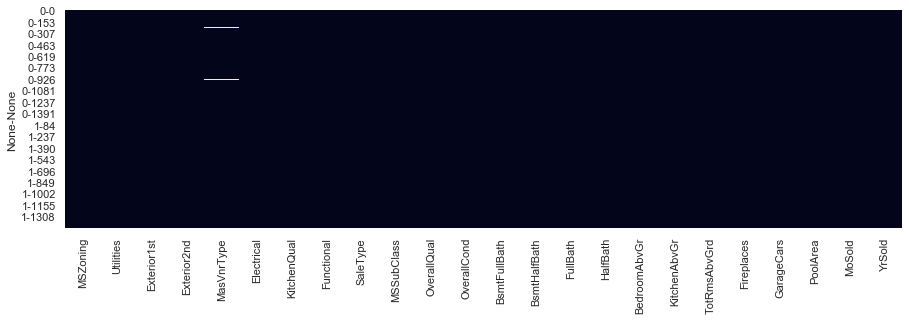

In [39]:
missing_categorical = missing_categorical+numeric_cats

# plotting a heatmap to see whether there are any missing values
plt.figure(figsize=(15, 4))
sns.heatmap(whole_df[missing_categorical].isna(),cbar=False)

We can se some missing values in BasVnrType

 BasVnrType is the Masonry veneer type which contains None as a value according to the data discription. hence will convert nan to 'None'

In [40]:
whole_df['MasVnrType'].fillna('None',inplace=True)

And since there is a relationship between the vaneer type and its area (None will mean 0 area as vaneer doesnt exist)

 we can substitute empty rows in MasVnrArea with 0 

In [41]:
whole_df['MasVnrArea'].fillna(0,inplace=True)

Replotting a nan heatmap to double check that our categorical data is free of nan

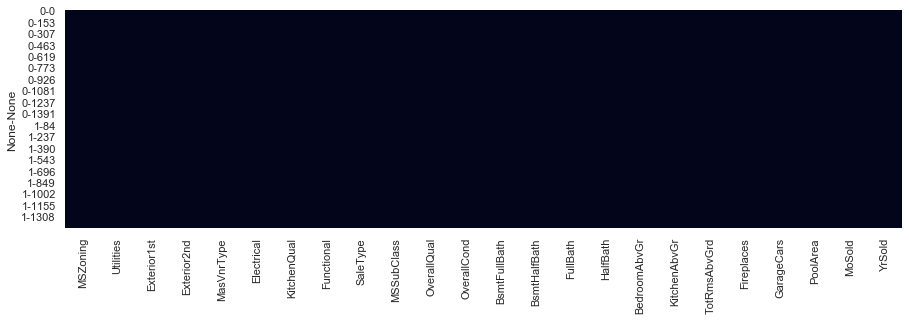

In [42]:
plt.figure(figsize=(15, 4))
sns.heatmap(whole_df[missing_categorical].isna(),cbar=False)

## filling numeric columns that are actually numeric

In [43]:
# this is because some columns in num_cols is categorical is seen above
actual_numeric = [col for col in num_cols if col not in numeric_cats]

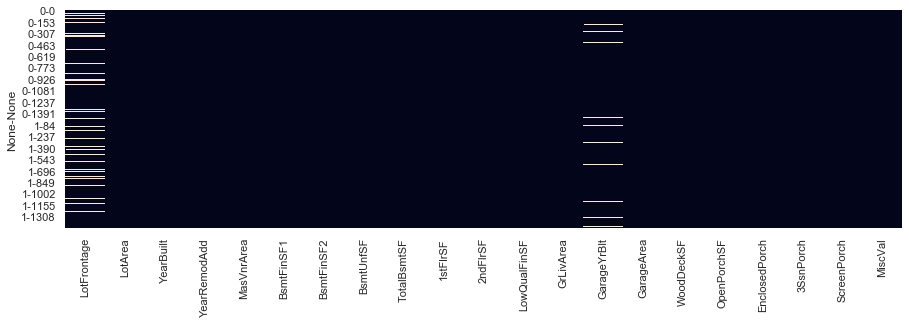

In [44]:
# checking how where the nan is in our continuos features
plt.figure(figsize=(15, 4))
sns.heatmap(whole_df[actual_numeric].isna(),cbar=False)

Since year built and garage year built matches, we can substitute 

In [45]:

whole_df['GarageYrBlt'].fillna(whole_df['YearBuilt'], inplace=True)


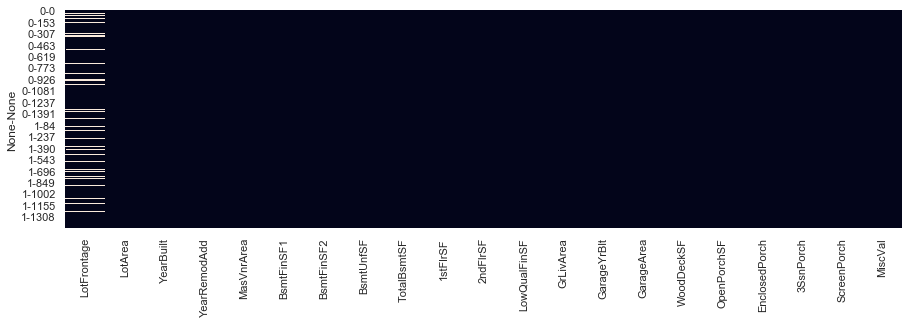

In [46]:
# checking for changes
plt.figure(figsize=(15, 4))
sns.heatmap(whole_df[actual_numeric].isna(),cbar=False)

 According to the description, LotFrontage is the linear feet of street connected to property
 
 Here, im asuming that multiple houses in the same neighborhood would have similar lot frontage

In [47]:
# grouping per neighborhood
# replacing nan values with the median of the neighborhood group

whole_df["LotFrontage"] = whole_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

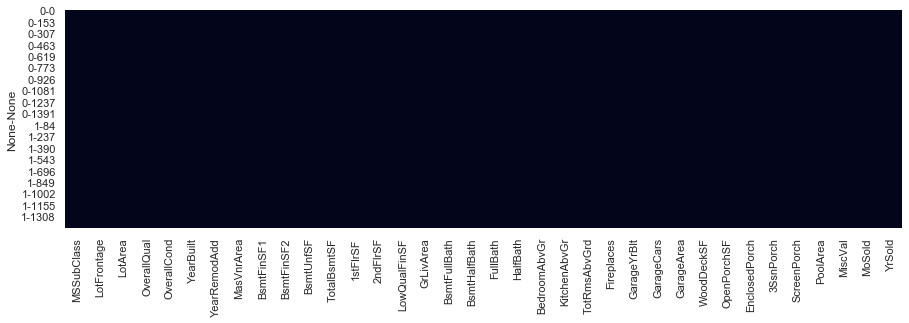

In [48]:
#checking for changes
plt.figure(figsize=(15, 4))
sns.heatmap(whole_df[num_cols].isna(),cbar=False)

### Checking the entire dataset

In [49]:
#checking for missing enteries
missing_percentage(whole_df,whole_df.columns, verbose = 1)

Missing data in MSZoning is 0.14%
Missing data in Utilities is 0.07%
Missing data in Exterior1st is 0.03%
Missing data in Exterior2nd is 0.03%
Missing data in BsmtFinSF1 is 0.03%
Missing data in BsmtFinSF2 is 0.03%
Missing data in BsmtUnfSF is 0.03%
Missing data in TotalBsmtSF is 0.03%
Missing data in Electrical is 0.03%
Missing data in KitchenQual is 0.03%
Missing data in Functional is 0.07%
Missing data in GarageArea is 0.03%
Missing data in SaleType is 0.03%


In [50]:
# All of these will be filled with 0 as the nan values are present when there is no basement or no garage or NA somewhere
whole_df.fillna(0,inplace=True)

In [51]:
#checking again
missing_percentage(whole_df,whole_df.columns, verbose = 1)

## Check the skewness of numeric values

Text(0.5, 1.0, 'Skewness of features')

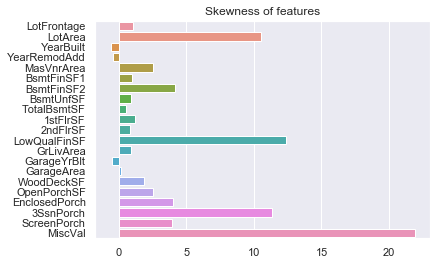

In [52]:
# Check the skew of all numerical features
numeric_skew = classify_distribution(whole_df,actual_numeric)
col_names = [col for col, val in numeric_skew]
skewness = [val for col, val in numeric_skew]

sns.barplot(x=skewness, y=col_names).set_title('Skewness of features')

According to above, some of our continuos features are very positively skewed. Hence, i will attempt to apply log transformation to all the continous features

(-2, 23)

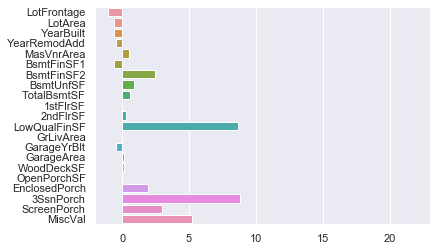

In [53]:
# this will contain all the numerical features
to_log = actual_numeric.copy()

# this contains some features that we do not want to transform
# transforming them will increase their skewness in the other direction
to_remove = ['GarageYrBlt','TotalBsmtSF','GarageArea','BsmtUnfSF']

# removing the columns in to_remove from to_log
for x in to_remove:
    to_log.remove(x)

# Apply log transformation to the remaining column sin to_log
whole_df[to_log] = np.log1p(whole_df[to_log])


# This is for plotting-----------------------------------
numeric_skew = classify_distribution(whole_df,actual_numeric)
col_names = [col for col, val in numeric_skew]
skewness = [val for col, val in numeric_skew]

sns.barplot(x=skewness, y=col_names).set_xlim((-2,23))

We can observe that log transformation helped drastically in decreasing the skewness in the continuos features in our dataset

## Converting categorical to dummies

In [54]:
# non_num_cols contains all categorical columns from the start
# numeric_cats contains numeric columns that we converted to string
all_category_cols = non_num_cols + numeric_cats


for col in all_category_cols:
    # get the dummies of that column
    dummy = pd.get_dummies(whole_df[col],prefix=col)
    # concatenate it with the dataframe 
    whole_df = pd.concat([whole_df,dummy], axis= 1)

    # remove the old categorical columns
whole_df.drop(labels=all_category_cols, axis=1,inplace=True)





## Prep for model

In [55]:
# log transforming the target 
target = np.log1p(target)

# readding the IDs back
whole_df['Id'] = whole_IDs

# separating the two dataframes (train.csv and test.csv)
df,df1 = whole_df.xs(0),whole_df.xs(1)

# readding the target to train.csv
df['SalePrice'] = target

C:\Users\TB\Anaconda3\envs\AI_Playground\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [56]:
# Making X and y data to train the model

X = df.drop(['SalePrice','Id'],axis=1)
y = df['SalePrice']



In [57]:
# this is used for experimentation only
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Models Testing

### Linear regression


In [58]:
# making a linear regression
lnr = LinearRegression()
# train it on train data from test_train split
lnr.fit(x_train, y_train)
y_hat = lnr.predict(x_test)
# measure the RMSE
linear_regression_rmse = np.sqrt(mean_squared_error(y_test,y_hat))
linear_regression_rmse

0.12500204957656363

### Linear regression with cross validation

In [59]:

# making folds to be 5 (it will be used for all the CV below)
kf = KFold(n_splits=5, shuffle=True)


lnr_cv = LinearRegression()

# getting a score after training and validating the model on 5 folds
cv_results = cross_val_score(lnr_cv, X, y, cv=kf,scoring='neg_root_mean_squared_error')
np.mean(cv_results)


-0.13531581104319662

### Lasso

In [60]:
# doing the same process but for lasso

lasso = Lasso(random_state=100)
lasso.fit(x_train,y_train)

y_hat = lasso.predict(x_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test,y_hat))
lasso_rmse

0.2460829419813156

### Lasso CV

In [61]:
# Using cross-validation with lasso

lasso_cv = Lasso(random_state=100)
cv_results = cross_val_score(lasso_cv, X, y, cv=kf,scoring='neg_root_mean_squared_error')
lasso_cv_rmse = np.mean(cv_results)
lasso_cv_rmse

-0.24817032892466528

### Ridge

In [62]:
rigde = Ridge(random_state=100)
rigde.fit(x_train,y_train)

y_hat = rigde.predict(x_test)
rigde_rmse = np.sqrt(mean_squared_error(y_test,y_hat))
rigde_rmse

0.11371760655558687

### Ridge CV

In [63]:
ridge_cv = Ridge(random_state=100)
cv_results = cross_val_score(ridge_cv, X, y, cv=kf,scoring='neg_root_mean_squared_error')
ridge_cv_rmse = np.mean(cv_results)
ridge_cv_rmse

-0.11969664009800093

### Elastic Net

In [64]:


elastic = ElasticNet(random_state=100)
elastic.fit(x_train,y_train)

y_hat = elastic.predict(x_test)
elastic_rmse = np.sqrt(mean_squared_error(y_test,y_hat))
elastic_rmse

0.24181062703080075

### Decision tree

In [65]:



dct = DecisionTreeRegressor(random_state=100)
dct.fit(x_train,y_train)

y_hat = dct.predict(x_test)
dct_rmse = np.sqrt(mean_squared_error(y_test,y_hat))
dct_rmse

0.19246253271000835

### Decision tree CV

In [66]:
dct_cv = DecisionTreeRegressor(random_state=100)

cv_results = cross_val_score(dct_cv, X, y, cv=kf,scoring='neg_root_mean_squared_error')
dct_cv_rmse = np.mean(cv_results)
dct_cv_rmse

-0.20067386097254752

### Gridsearch Lasso

In [67]:
lasso_gc = Lasso(random_state=100)
params = {'alpha':[0.0008,0.0007,0.0009,0.001,0.002,0.003,0.6,0.7,0.8],'max_iter':[10000,1000]}
lasso_gc = GridSearchCV(lasso_gc, params,cv=kf,scoring='neg_root_mean_squared_error')

lasso_gc.fit(X,y)
lasso_gc.best_score_

-0.1137775960974666

In [68]:
lasso_gc.best_params_

{'alpha': 0.0007, 'max_iter': 10000}

### Gridsearch Ridge

In [69]:
ridge_gc = Ridge(random_state=100)
params = {'alpha':[0.8,0.9,1,1.1],'max_iter':[10000,1000]}
ridge_gc = GridSearchCV(ridge_gc, params,cv=kf,scoring='neg_root_mean_squared_error')

ridge_gc.fit(X,y)
ridge_gc.best_score_

-0.11642393742379731

In [70]:
ridge_gc.best_params_

{'alpha': 1.1, 'max_iter': 10000}

### Gridsearch Elastic net

In [71]:
elastic_gc = ElasticNet()
params = {'l1_ratio':[0.9,0.8,0.7,0.1,0.2,0.3,0.4],'max_iter':[10000,1000]}
elastic_gc = GridSearchCV(elastic_gc, params,cv=kf,scoring='neg_root_mean_squared_error')

elastic_gc.fit(X,y)
elastic_gc.best_score_

-0.2071636380581055

In [72]:
elastic_gc.best_params_

{'l1_ratio': 0.1, 'max_iter': 10000}

### GridSearch  Decision Tree

In [73]:



dct_select = DecisionTreeRegressor(random_state=24)

params = {'max_depth':[2,5,8,10,12,15],'min_samples_split':[20,25,30,40,50,60],'min_samples_leaf':[1,4,10,20,25,30],"max_features":['auto']}
dct_select_gc = GridSearchCV(dct_select, params,cv=kf,scoring='neg_root_mean_squared_error')

dct_select_gc.fit(X,y)
dct_select_gc.best_score_

-0.18599380430161427

In [74]:
dct_select_gc.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 25}

### Using lasso model for feature selection

we have over 300 features in our dataset, what if we reduce them and try to fit them again

In [75]:
lasso_model = Lasso(alpha=0.0007, max_iter=10000)
lasso_model.fit(X,y)
coefs = [idx for idx, col in enumerate(lasso_model.coef_) if abs(col) > 0.00005]
print("{} features selected".format(len(coefs)))

selected_cols = [X.columns[col_index] for col_index in coefs]

119 features selected


### Linear Regression on selected features

In [76]:
select_lnr = LinearRegression()
cv_results = cross_val_score(select_lnr, X[selected_cols], y, cv=kf,scoring='neg_root_mean_squared_error')
np.mean(cv_results)
# improved 

-0.1098558336739582

### Ridge opt CV on selected features

In [77]:
ridge_cv_select = Ridge(alpha= 9.5, max_iter= 10000)
cv_results = cross_val_score(ridge_cv_select, X[selected_cols], y, cv=kf,scoring='neg_root_mean_squared_error')
np.mean(cv_results)


-0.11134261541901122

### Elastic net CV on selected features

In [78]:
elastic_select = ElasticNet(l1_ratio=0.1)
cv_results = cross_val_score(elastic_select, X[selected_cols], y, cv=kf,scoring='neg_root_mean_squared_error')
np.mean(cv_results)

-0.20729554758429375

### Decision tree on selected features

In [79]:
dct_select = DecisionTreeRegressor(max_depth= 12,max_features= 'auto',min_samples_leaf= 10,min_samples_split=20)
cv_results = cross_val_score(dct_select, X[selected_cols], y, cv=kf,scoring='neg_root_mean_squared_error')
np.mean(cv_results)

-0.18753613537504424

## top 3 models with and without feature selection

In [80]:
# ridge on feature selection
ridge_cv = Ridge(alpha=0.99, max_iter=10000)
cv_results = cross_val_score(ridge_cv, X[selected_cols], y, cv=kf,scoring='neg_root_mean_squared_error')
ridge_cv_rmse = np.mean(cv_results)
ridge_cv_rmse

-0.10956003494134928

In [81]:
# ridge without feature selection
ridge_cv = Ridge(alpha=0.99, max_iter=10000)
cv_results = cross_val_score(ridge_cv, X, y, cv=kf,scoring='neg_root_mean_squared_error')
ridge_cv_rmse = np.mean(cv_results)
ridge_cv_rmse

-0.119231137692642

In [82]:
# linear reg with feature selection
l = LinearRegression()
cv_results = cross_val_score(l, X[selected_cols], y, cv=kf,scoring='neg_root_mean_squared_error')
l_cv_rmse = np.mean(cv_results)
l_cv_rmse

-0.10965142158611833

In [83]:
# linear reg without feature selection
l = LinearRegression()
cv_results = cross_val_score(l, X, y, cv=kf,scoring='neg_root_mean_squared_error')
l_cv_rmse = np.mean(cv_results)
l_cv_rmse

-0.128930612740417

## Final Model

In [84]:
ridge_cv = Ridge(alpha=0.99, max_iter=10000)
ridge_cv.fit(X[selected_cols],y)

Ridge(alpha=0.99, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [85]:
# IDs is not used in prediction
ids = df1.pop('Id')

In [86]:

X_test = df1

# using the model to predict the house prices
yhat = ridge_cv.predict(X_test[selected_cols])

In [87]:
# inverse the log transforem and store it in the dataframe
outdf = pd.DataFrame({'Id':ids,'SalePrice':np.expm1(yhat)})
#save it as a csv file
outdf.to_csv('submissionv6.csv', index=False)